# HW 7

**Upload 2 files** to Gradescope:
* **HW7.py** (for the autograder)
* **HW7.ipynb** (for manual grading)
___

In [786]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

### Simple Encryption

Write a function **`encrypt(string)`** that takes a string and returns an encrypted string, using this scheme:
* Convert each character to unicode using the `ord()` function.
* Add 10 to each code.
* Convert each new code into a character using the `chr()` function.
* Concatenate the new characters and return the resulting string.

*Note:* The letters of the alphabet, numbers, and usual punctuation symbols all have relatively small unicode values, so adding 10 will produce a unicode value corresponding to another character.
      
Example:<br>
`encrypt('A Tale of 2 Cities')` returns `'K*^kvo*yp*<*Ms~so}'`.

In [788]:
def encrypt(string):
    uni = [ord(string[n]) for n in range(len(string))]
    new_uni = [uni[n] + 10 for n in range(len(string))]
    word = [chr(new_uni[n]) for n in range(len(string))]
    return ''.join(word)

In [789]:
encrypt('A Tale of 2 Cities')

'K*^kvo*yp*<*Ms~so}'

Write a function **`decrypt(string)`** that reverses the `encrypt()` operation.
      
Example:<br>
`decrypt('K*^kvo*yp*<*Ms~so}')` returns `'A Tale of 2 Cities'`.

In [791]:
def decrypt(string):
    uni = [ord(string[n]) for n in range(len(string))]
    old_uni = [uni[n] - 10 for n in range(len(string))]
    word = [chr(old_uni[n]) for n in range(len(string))]
    return ''.join(word)

In [792]:
decrypt('K*^kvo*yp*<*Ms~so}')

'A Tale of 2 Cities'

### Strings to Numbers

Write a function **`eval_arith(str_expr)`** that takes an arithmetic expression of the form
```
<integer> <op> <integer>
```
in string format and returns the value of the expression as an `int`. The operator `op` can be one of `'+'`, `'-'`, `'*'`, or `'**'`. Assume that the integers are positive. There may be whitespace characters in the expression.

Examples:<br>
`eval_arith('4+91')` returns `95`.<br>
`eval_arith('   12  *5   ')` returns `60`.<br>
`eval_arith('2** 3') + eval_arith('2 - 3')` returns `7`.<br>

In [794]:
def eval_arith(str_expr):
    stripped = str_expr.strip()
    if '**' in stripped:
        nums = stripped.split('**')
        operator = '**'
    elif '+' in stripped:
        nums = stripped.split('+')
        operator = '+'
    elif '-' in stripped:
        nums = stripped.split('-')
        operator = '-'
    elif '*' in stripped:
        nums = stripped.split('*')
        operator = '*'
    int_1 = int(nums[0].strip())
    int_2 = int(nums[1].strip())
    if operator == '+':
        return int_1 + int_2
    elif operator == '-':
        return int_1 - int_2
    elif operator == '*':
        return int_1 * int_2
    elif operator == '**':
        return int_1 ** int_2

In [795]:
eval_arith('4+91')

95

In [796]:
eval_arith('   12   *5   ')

60

In [797]:
eval_arith('2**3') + eval_arith('2 - 3')

7

Write a function **`eval_arith_file(filename)`** that reads in a file named `filename` that contains one arithmetic expression on each line and returns a list containing the value of each expression. The function should call `eval_arith()`.

Example: If a file named `'arith.txt'` contains
```
4+91
   12  *5   
2** 3
 2- 3 
```
then `eval_arith_file('arith.txt')` returns `[95, 60, 8, -1]`.

In [799]:
def eval_arith_file(filename):
    with open(filename) as fp:
        data = fp.read()
    expr = data.split('\n')
    l = []
    for n in range(len(expr)):
        l.append(eval_arith(expr[n]))

    return l

In [800]:
eval_arith_file('arith.txt')

[95, 60, 8, -1]

### Plotting Functions

Write a function **`plot_funcs(funcs, interval=(-3,3))`** that displays the list of functions in `funcs`. If `funcs` is a single function, only that function is displayed. The default $x$ interval, passed as a tuple, is $[-3,3]$. Set the aspect ratio with `plt.axis('equal')`.

Examples:<br>
`plot_funcs(math.sin)` displays

<img src="http://www.coloradomath.org/python/plot-sin.png" />

`plot_funcs([math.sin, math.cos], (0, 4*math.pi))` displays

<img src="http://www.coloradomath.org/python/plot-sin-cos.png" />


In [802]:
def plot_funcs(funcs, interval=(-3, 3)):
    xvals = np.linspace(interval[0], interval[1], 100)
    if not isinstance(funcs, list):
        funcs = [funcs]
    for func in funcs:
        yvals = [func(x) for x in xvals] # REMEMBER THIS
        plt.plot(xvals, yvals)
    plt.axis('equal')

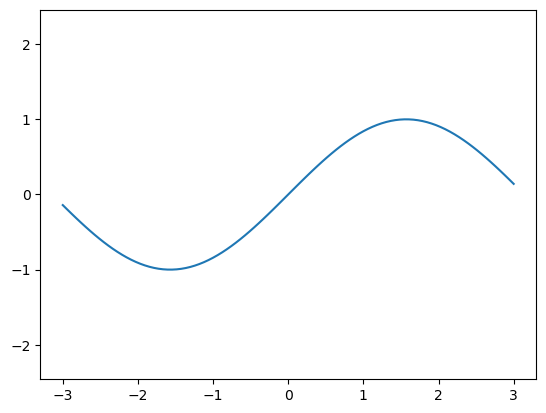

In [803]:
plot_funcs(math.sin)

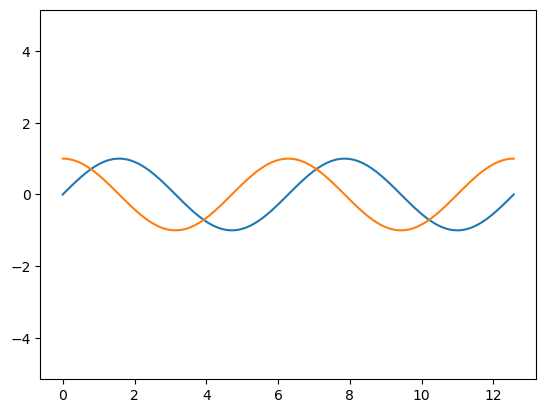

In [804]:
plot_funcs([math.sin, math.cos], (0, 4*math.pi))

### Tangent Line

Write a function **`tangent_line(func, funcd, xcoord, interval=(-3,3))`** that displays a function `func` and the tangent line at a given $x$ coordinate given the derivative function `funcd`. The default $x$ interval for `func`, passed as a tuple, is $[-3,3]$. The $x$ interval for the tangent line is $1/3$ the length of the interval. Assume that the tangent slope is not infinite. The function should call `plot_funcs()`.

Examples:<br>
```
tangent_line(math.sin, math.cos, 1.2)
``` 
<img src="http://www.coloradomath.org/python/sin-tangent.png" />

```
def sinfunc(x):
    return x * math.sin(x)

def sinfuncd(x):
    return x*math.cos(x) + math.sin(x)

tangent_line(sinfunc, sinfuncd, -.5, (-6, 6))
```

<img src="http://www.coloradomath.org/python/xsinx-tangent.png" />


In [806]:
def tangent_line(func, funcd, xcoord, interval=(-3, 3)):
    # Plot the original function
    plot_funcs(func, interval)
    # Plot the point
    plt.plot(xcoord, func(xcoord), 'o', c='k')
    # Plot the tangent line
    f_prime = funcd(xcoord)
    xvals = np.linspace(xcoord - ((interval[1]-interval[0])/6), xcoord + ((interval[1]-interval[0])/6), 100)
    yval = f_prime*xvals - f_prime*xcoord + func(xcoord)
    plt.plot(xvals, yval)

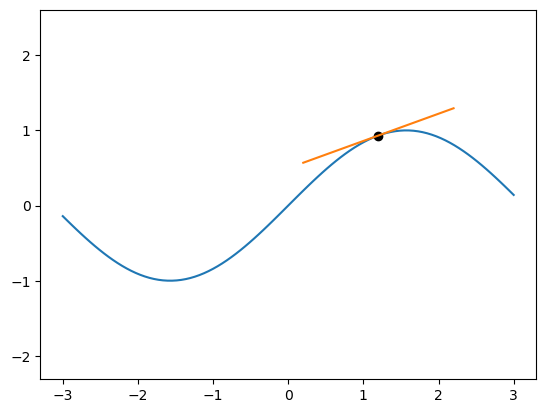

In [807]:
tangent_line(math.sin, math.cos, 1.2)

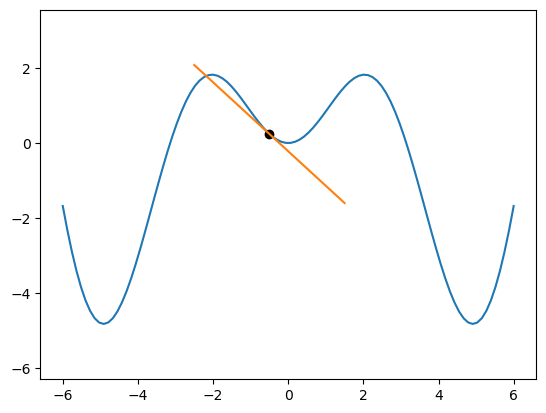

In [808]:
def sinfunc(x):
    return x * math.sin(x)

def sinfuncd(x):
    return x*math.cos(x) + math.sin(x)

tangent_line(sinfunc, sinfuncd, -.5, (-6, 6))

### A Square
Write a function **`square(pos, sidelen, color)`** that draws a filled square given the $(x, y)$ position of the lower left corner, the side length, and the fill color. The default position is $(0, 0)$, the default side length is 1, and the default color is `cugold`.

`cugold = '#D0B97C'`

Example:<br>
```
square()
square((1,0), 0.5, 'Brown')
```
<img src="http://www.coloradomath.org/python/squares2.png" />


In [810]:
def square(pos=(0, 0), sidelen=1, color='#D0B97C'):
    xvals = [pos[0], pos[0] + sidelen, pos[0] + sidelen, pos[0], pos[0]]
    yvals = [pos[1], pos[1], pos[1] + sidelen, pos[1] + sidelen, pos[1]]
    plt.fill(xvals, yvals, color=color)
    plt.axis('equal')
    plt.axis('off')

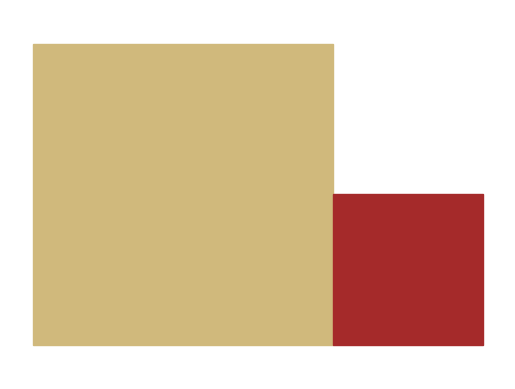

In [811]:
square()
square((1,0), 0.5, 'Brown')

### Row of Squares

Write a function **`squares_row(nsquares, pos, sidelen, colors)`** that draws `nsquares` filled squares given the position of the lower left corner of the first square, the side length of each square, and the fill colors to cycle through. The default position is $(0, 0)$, the default side length is 1, and the default colors are `cugold` and `cugray`. The function should call `square()`.

`cugold = '#D0B97C'`<br>
`cugray = '#424242'`

```
squares_row(6)
```
<img src="http://www.coloradomath.org/python/squares-row-cu.png" />

```
squares_row(6, colors=['b', 'm', 'g'])
```
<img src="http://www.coloradomath.org/python/squares-row-colors.png" />


In [814]:
def squares_row(nsquares, pos=(0, 0), sidelen=1, colors=['#D0B97C', '#424242']):
    for n in range(nsquares):
        square((pos[0]+n*sidelen, pos[1]), sidelen, colors[n % len(colors)])

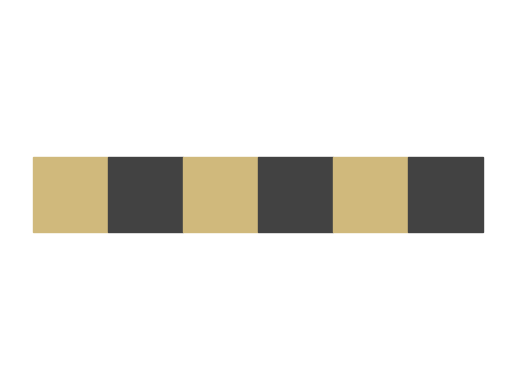

In [815]:
squares_row(6)

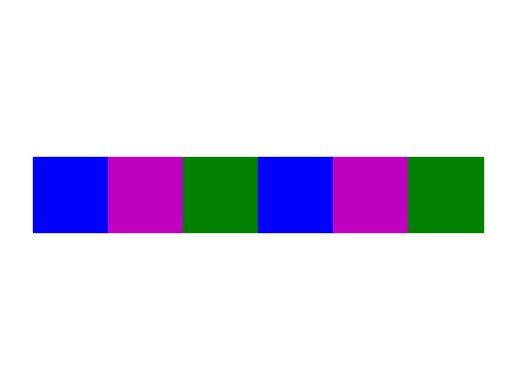

In [816]:
squares_row(6, colors=['b', 'm', 'g'])

### Checkerboard

Write a function **`board(size, colors)`** that draws a checkerboard of `size` by `size` squares given the fill colors to cycle through. The function should call `squares_row()`.

```
board(8)
```
<img src="http://www.coloradomath.org/python/board-cu.png" />

```
board(8, ['b', 'm', 'g'])
```
<img src="http://www.coloradomath.org/python/board-colors.png" />


In [819]:
def board(size, colors=['#D0B97C', '#424242']):
    for n in range(size):
        new = colors[n%len(colors):] + colors[:n%len(colors)]
        squares_row(size, (0, 0+n), 1, new)

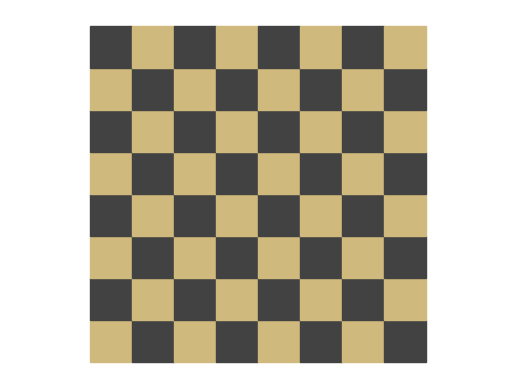

In [820]:
board(8)

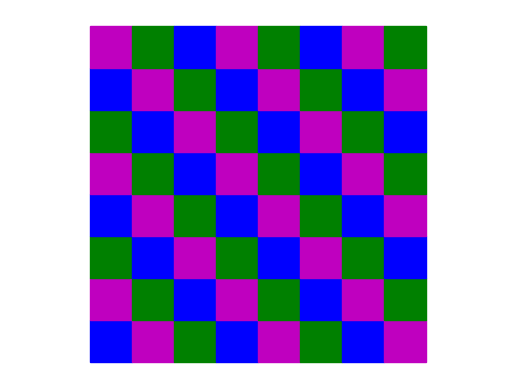

In [821]:
board(8, ['b', 'm', 'g'])